<a href="https://colab.research.google.com/github/codml/AI_jupyter/blob/main/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient=tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


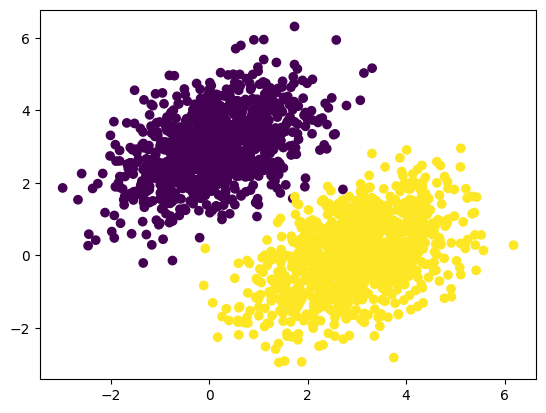

In [5]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

0-step loss: 6.6225
1-step loss: 0.8603
2-step loss: 0.2437
3-step loss: 0.1588
4-step loss: 0.1398
5-step loss: 0.1296
6-step loss: 0.1210
7-step loss: 0.1133
8-step loss: 0.1062
9-step loss: 0.0997
10-step loss: 0.0938
11-step loss: 0.0883
12-step loss: 0.0833
13-step loss: 0.0787
14-step loss: 0.0745
15-step loss: 0.0706
16-step loss: 0.0671
17-step loss: 0.0638
18-step loss: 0.0608
19-step loss: 0.0580
20-step loss: 0.0555
21-step loss: 0.0532
22-step loss: 0.0511
23-step loss: 0.0491
24-step loss: 0.0473
25-step loss: 0.0457
26-step loss: 0.0442
27-step loss: 0.0428
28-step loss: 0.0415
29-step loss: 0.0404
30-step loss: 0.0393
31-step loss: 0.0383
32-step loss: 0.0374
33-step loss: 0.0366
34-step loss: 0.0358
35-step loss: 0.0351
36-step loss: 0.0345
37-step loss: 0.0339
38-step loss: 0.0334
39-step loss: 0.0329


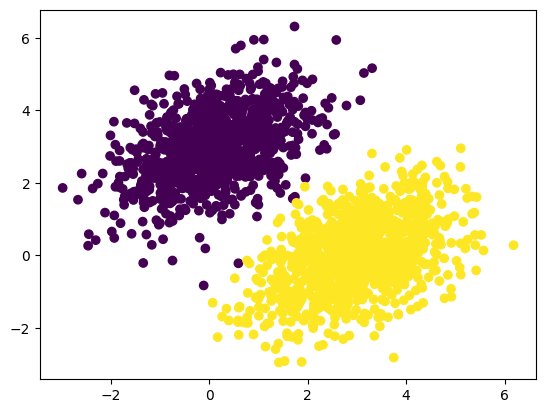

In [8]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate*grad_loss_wrt_W)
    b.assign_sub(learning_rate*grad_loss_wrt_b)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}-step loss: {loss:.4f}')

predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]> 0.5)
plt.show()

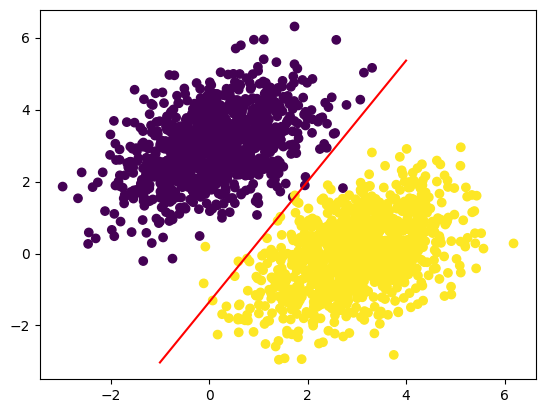

In [12]:
x = np.linspace(-1,4,100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [13]:
#keras
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)
